In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [6]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import kneighbors_graph
from sklearn.inspection import permutation_importance

In [7]:
df = pd.read_csv('dataset.csv')

In [8]:
print(df.head(5))

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [9]:
print(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
df = df.dropna()
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


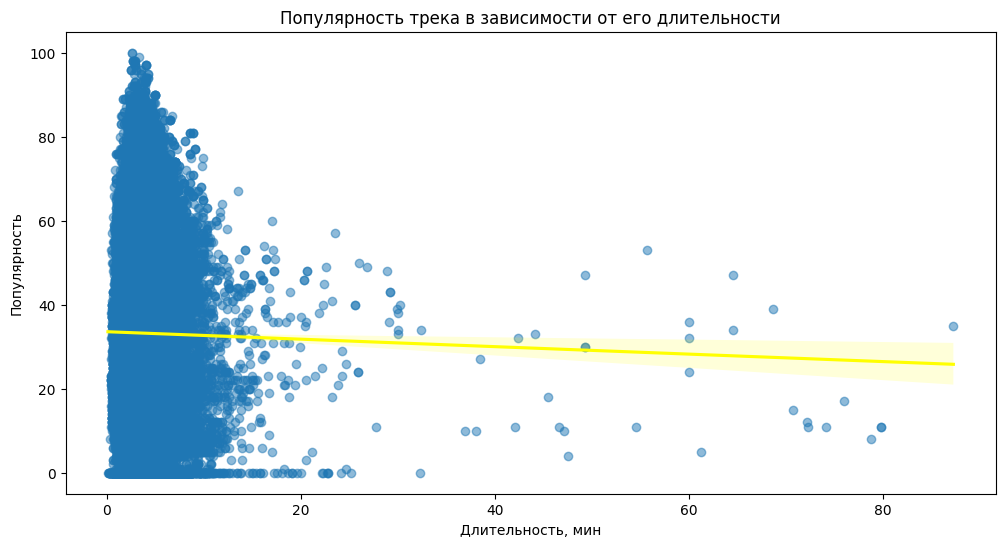

In [11]:
# Добавляем новый столбец в DataFrame, в котором длительность треков (в миллисекундах) конвертируется в минуты
df['duration_min'] = df['duration_ms'] / 60000 
# Создаем фигуру для графика, задаем размеры окна визуализации
plt.figure(figsize=(12, 6))
# Строим регрессионный график, показывающий связь между длительностью трека и его популярностью
sns.regplot(
    data=df,                # Исходный DataFrame с данными
    x='duration_min',       # Ось X - длительность трека в минутах
    y='popularity',         # Ось Y - популярность трека
    scatter_kws={'alpha': 0.5},  # Настройки точек: полупрозрачность для уменьшения визуального "шума"
    line_kws={'color': 'yellow'} # Настройки линии регрессии: цвет линии - желтый
)
plt.title('Популярность трека в зависимости от его длительности')
plt.xlabel('Длительность, мин')
plt.ylabel('Популярность')
plt.show()

In [12]:
avg_popularity = df['popularity'].mean()
avg_duration_min = df['duration_ms'].mean() / 60000

avg_duration = str(datetime.timedelta(minutes=avg_duration_min))

print(f'Средняя популярность трека: {avg_popularity}')
print(f'Средняя длительность трека: {avg_duration}')

Средняя популярность трека: 33.23882665637418
Средняя длительность трека: 0:03:48.031153


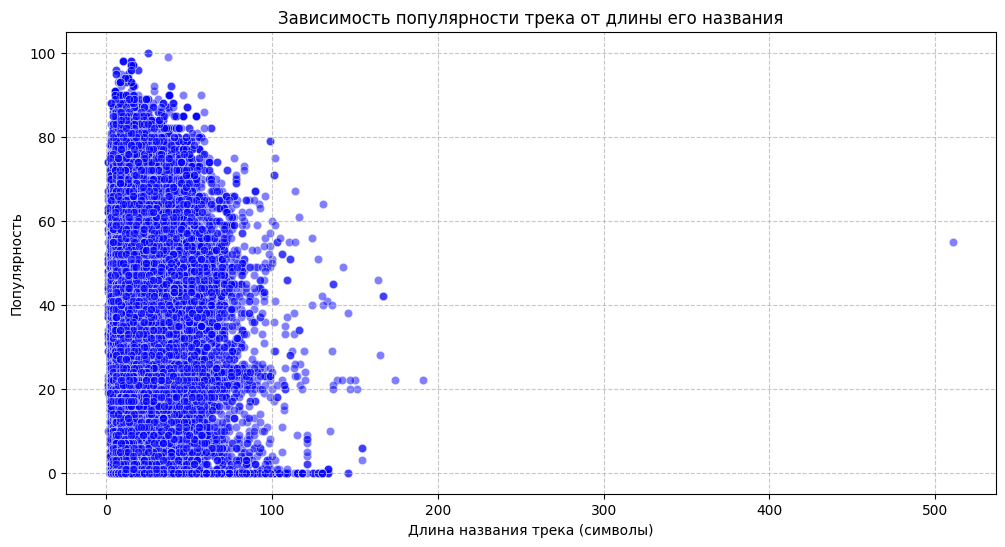

In [13]:
# Создаем новый столбец в DataFrame, где вычисляется длина названия каждого трека (количество символов в строке)
df['track_name_length'] = df['track_name'].str.len() 
# Создаем фигуру для графика, задаем размеры окна визуализации
plt.figure(figsize=(12, 6))
# Строим график-рассеяние, показывающий зависимость популярности трека от длины его названия
sns.scatterplot(
    data=df,                    # Исходный DataFrame с данными
    x='track_name_length',      # Ось X - длина названия трека в символах
    y='popularity',             # Ось Y - популярность трека
    alpha=0.5,                  # Прозрачность точек для уменьшения визуального "шума" в случае наложения
    color='b'                   # Цвет точек (синий)
)
plt.title('Зависимость популярности трека от длины его названия')
plt.xlabel('Длина названия трека (символы)')
plt.ylabel('Популярность')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_95640\2499255055.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


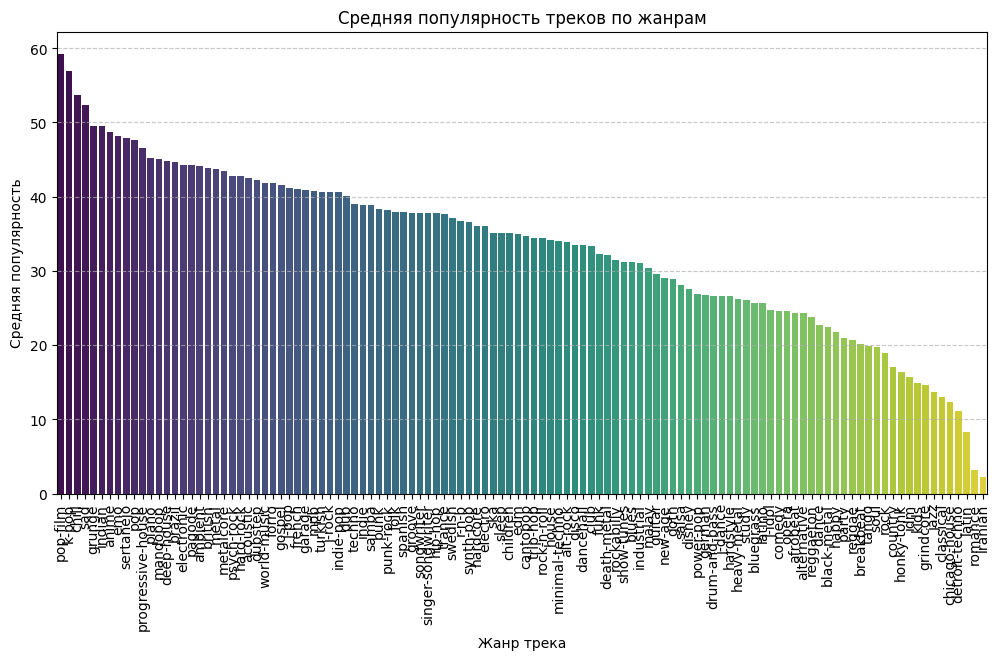

In [14]:
# Группируем данные по жанрам треков и вычисляем среднюю популярность для каждого жанра
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()
# Сортируем данные по средней популярности в порядке убывания
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)
# Создаем фигуру для графика, задаем размеры окна визуализации
plt.figure(figsize=(12, 6))
# Строим столбчатую диаграмму, отображающую среднюю популярность треков по жанрам
sns.barplot(
    data=genre_popularity,  # Используемый DataFrame с данными о жанрах и их популярности
    x='track_genre',        # Ось X - названия жанров
    y='popularity',         # Ось Y - средняя популярность жанра
    palette='viridis'       # Цветовая палитра для улучшения визуального восприятия
)
plt.title('Средняя популярность треков по жанрам')
plt.xticks(rotation=90)
plt.xlabel('Жанр трека')
plt.ylabel('Средняя популярность')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



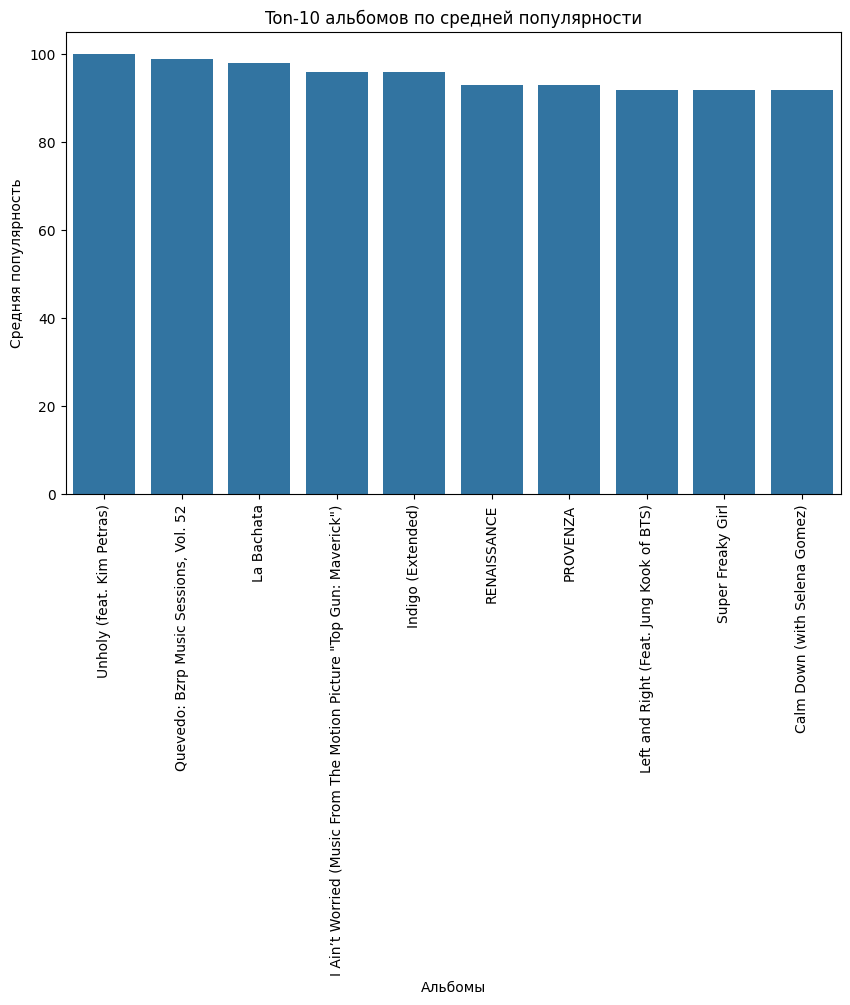

In [15]:
# Группировка данных по имени альбома и вычисление средней популярности треков для каждого альбома
album_popularity = df.groupby('album_name')['popularity'].mean().reset_index()
# Создание фигуры для построения графика с заданными размерами
plt.figure(figsize=(10, 6))
# Построение столбчатой диаграммы для топ-10 альбомов с наивысшей средней популярностью
sns.barplot(
    data=album_popularity.sort_values('popularity', ascending=False).head(10),  # Сортируем альбомы по популярности и берем топ-10
    x='album_name',  # Ось X - названия альбомов
    y='popularity'   # Ось Y - средняя популярность альбома
)
plt.title('Ton-10 альбомов по средней популярности')
plt.xticks(rotation=90)
plt.xlabel ('Альбомы')
plt.ylabel ('Средняя популярность')
plt.show()

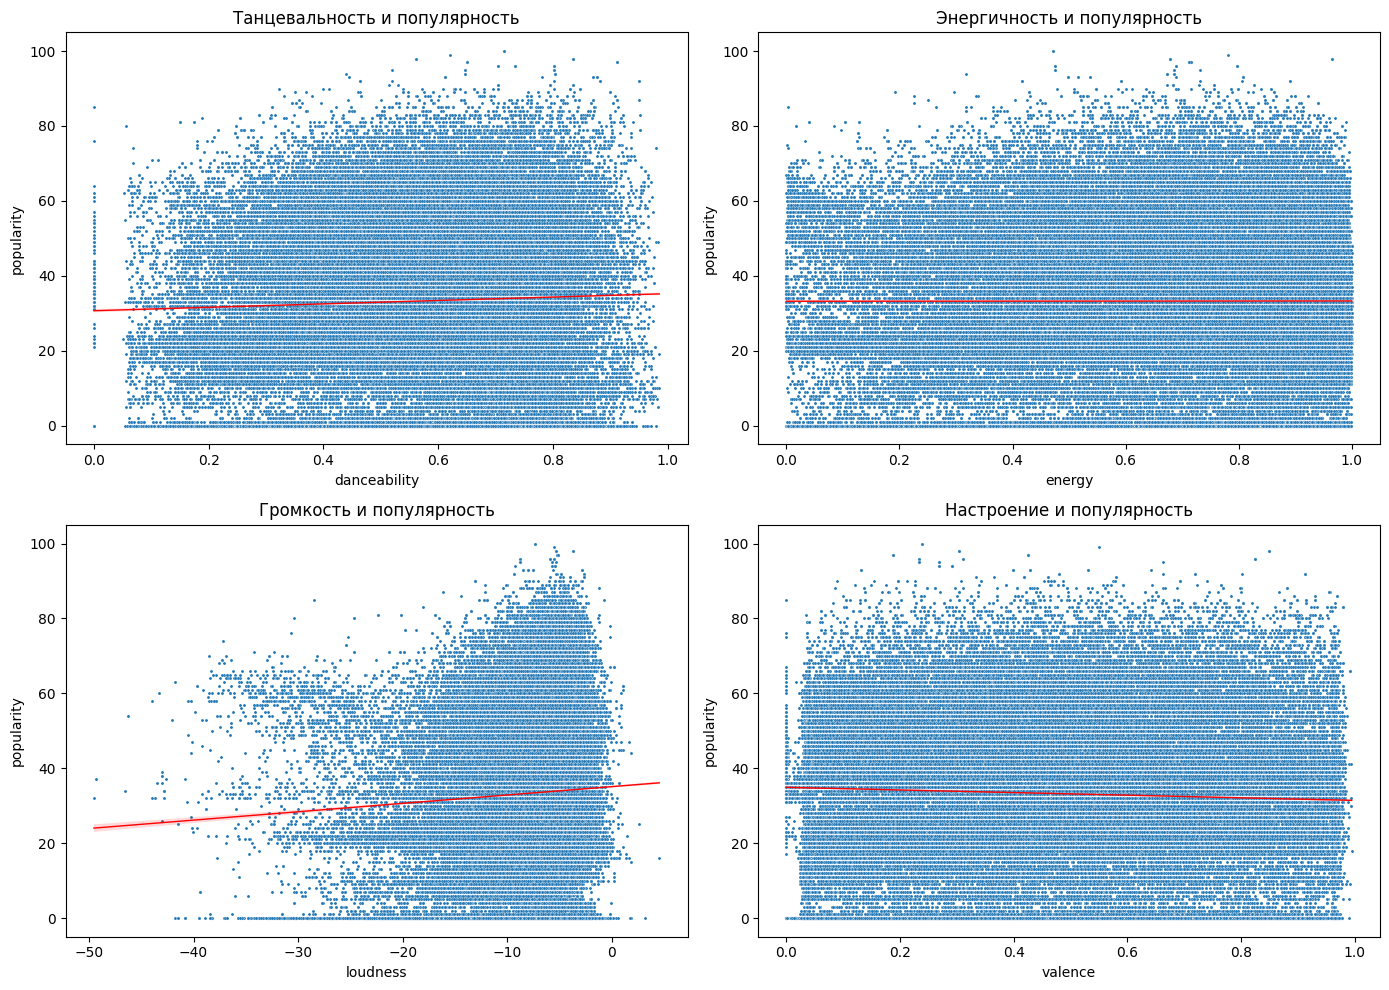

In [16]:
# Словарь для перевода английских названий характеристик треков на русский язык
translations = { 
    "danceability": "Танцевальность",
    "energy": "Энергичность",
    "loudness": "Громкость",
    "valence": "Настроение"
}
features = ['danceability', 'energy', 'loudness', 'valence']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
titles = ["Танцевальность и популярность", "Энергичность и популярность", "Громкость и популярность", "Настроение и популярность"]
# Итерация по каждому признаку из списка 'features'
for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    # Построение графика-рассеяния зависимости между характеристикой трека и его популярностью
    sns.scatterplot(data=df, x=feature, y='popularity', ax=ax, s=5) 
    ax.set_title(titles[i])
    ax.set_xlabel(translations[feature])
    # Добавление линии регрессии для визуализации общей тенденции
    sns.regplot(
        data=df, 
        x=feature, 
        y='popularity', 
        ax=ax, 
        scatter=False,      
        color='red',         
        line_kws={"linewidth": 1}  
    )
plt.tight_layout()
plt.show()

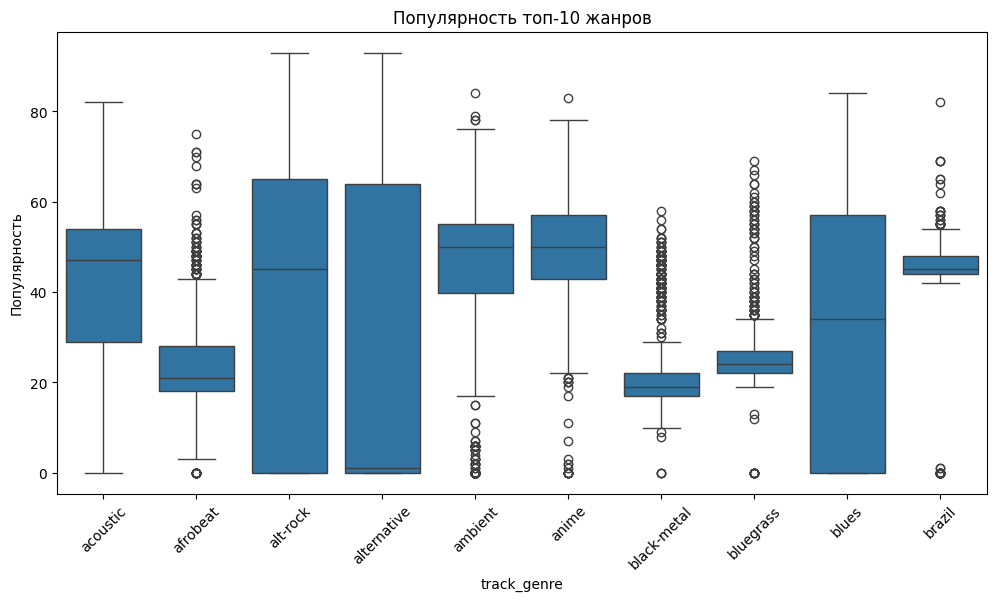

In [17]:
# Используем value_counts() для подсчета количества треков в каждом жанре
# Затем выбираем 10 жанров с наибольшим количеством треков (head(10))
top_genres = df['track_genre'].value_counts().head(10).index
# Фильтруем данные, оставляя только треки из топ-10 жанров
# Используем метод isin() для фильтрации по списку популярных жанров
filtered_data = df[df['track_genre'].isin(top_genres)]
plt.figure(figsize=(12, 6))
# Создаем боксплот для отображения популярности по жанрам
# 'sns.boxplot' позволяет визуализировать распределение популярности для каждого жанра,
# показывая медиану, квартили и выбросы
sns.boxplot(data=filtered_data, x='track_genre', y='popularity')
plt.title('Популярность топ-10 жанров')
plt.xticks(rotation=45)
plt.ylabel('Популярность')
plt.show()


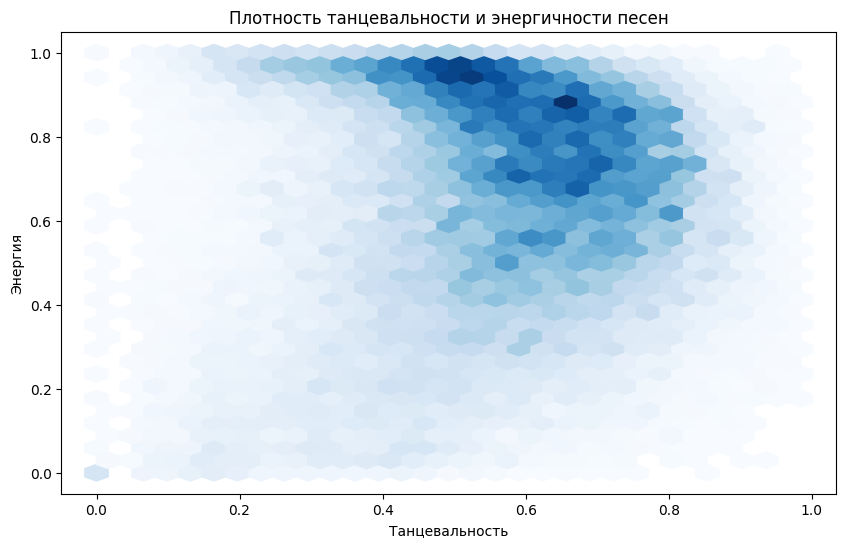

In [18]:
# Используем hexbin-график, который группирует точки в шестиугольники.
# Это позволяет визуализировать концентрацию точек, показывая плотность данных.
plt.figure(figsize=(10, 6))
# Построение hexbin-графика для анализа плотности между танцевальностью и энергичностью треков.
# Оси графика: 'danceability' (танцевальность) по оси X и 'energy' (энергичность) по оси Y.
# Параметр 'gridsize=30' определяет размер сетки шестиугольников: большее значение уменьшает размер каждого шестиугольника.
# Параметр 'cmap' задает цветовую палитру, в данном случае используется градиентная синяя палитра ('Blues').
# Параметр 'mincnt=1' означает, что шестиугольники с менее чем 1 треком не будут окрашены.
plt.hexbin(df['danceability'], df['energy'], gridsize=30, cmap='Blues', mincnt=1)
plt. title('Плотность танцевальности и энергичности песен')
plt.xlabel('Танцевальность')
plt.ylabel ('Энергия')
plt.show()

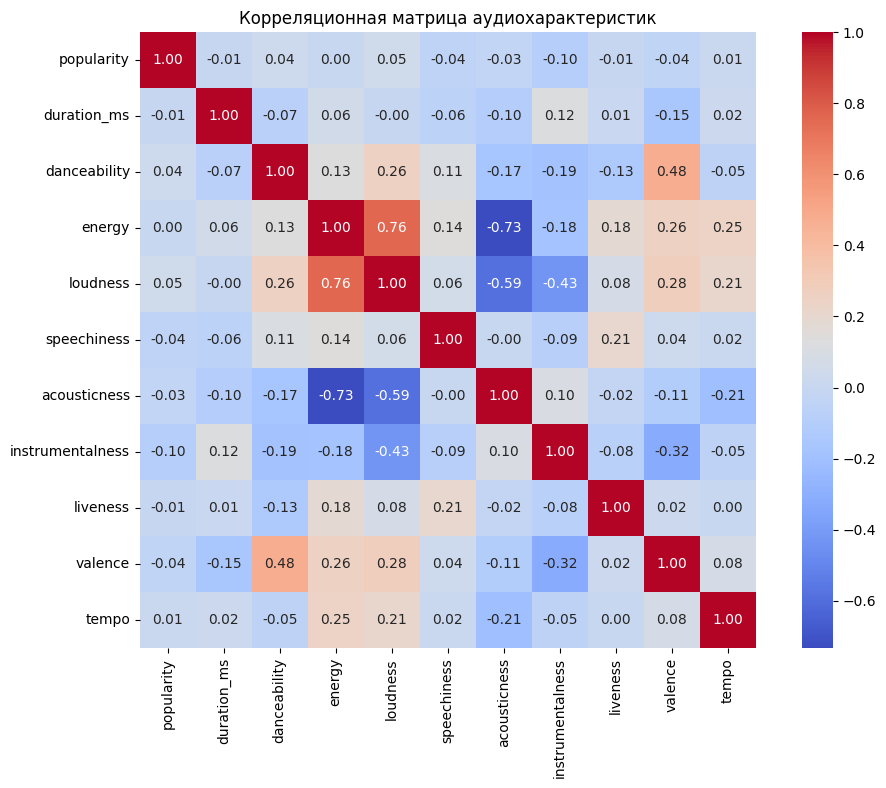

In [19]:
# Вычисляем корреляционную матрицу для выбранных столбцов, используя метод .corr()
correlation_matrix = df[['popularity', 'duration_ms', 'danceability',
'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo']].corr()
plt. figure(figsize=(12, 8))
# Создание тепловой карты с помощью seaborn # 'annot=True' добавляет аннотации с коэффициентами корреляции на карту # 'fmt='.2f'' задает формат отображения чисел
#'стар" устанавливает цветовую палитру, 'coolwarm' создаёт переход между холодными и тёплыми цветами # 'square=True' делает ячейки квадратными
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',square=True)
plt.title( 'Корреляционная матрица аудиохарактеристик') 
plt.show()

Корреляционная матрица демонстрирует, что популярность песен слабо связана с основными аудиохарактеристиками. Это предполагает, что успех композиции (ее популярность) определяется более сложным набором факторов, включающим внешние обстоятельства, такие как маркетинговые стратегии, социальные тренды или культурный контекст.

Ключевые наблюдения:
Популярность и аудиохарактеристики:

Корреляция популярности (popularity) с большинством аудиохарактеристик крайне слабая, находясь в диапазоне от -0.10 до 0.05.
Это говорит о том, что ни одна из измеряемых аудиохарактеристик не является значимым фактором успеха трека. Вероятно, популярность больше зависит от социальных, культурных и маркетинговых факторов, нежели от аудиопараметров.
Длительность трека (duration_ms):

Корреляция между длительностью и популярностью составляет всего -0.01, что указывает на практически полное отсутствие связи. Длина трека, как правило, не является определяющим фактором популярности.
Танцевальность (danceability):

Параметр danceability имеет заметную положительную корреляцию с:
Valence (настроение): 0.48, что указывает на связь между танцевальными треками и их позитивной атмосферой.
Энергия: 0.13, что говорит о небольшой связи между танцевальностью и энергией треков.
Однако с популярностью танцевальность практически не связана.
Энергия (energy) и громкость (loudness):

Между энергией и громкостью наблюдается сильная положительная корреляция (0.76), что ожидаемо, поскольку более энергичные треки часто звучат громче.
Корреляция энергии с популярностью равна 0.00, что подтверждает отсутствие значимой зависимости.
Акустичность (acousticness) и инструментальность (instrumentalness):

Эти параметры имеют сильную отрицательную корреляцию с энергией (-0.73) и громкостью (-0.59), что указывает на менее энергичный характер акустических и инструментальных треков.
Несмотря на это, такие треки могут сохранять свою популярность среди узкой аудитории, ориентированной на определенные жанры.
Связь между характеристиками:

Valence (настроение) положительно коррелирует с:
Danceability (0.48): более позитивные треки часто более танцевальные.
Energy (0.26): позитивные треки могут быть более энергичными.

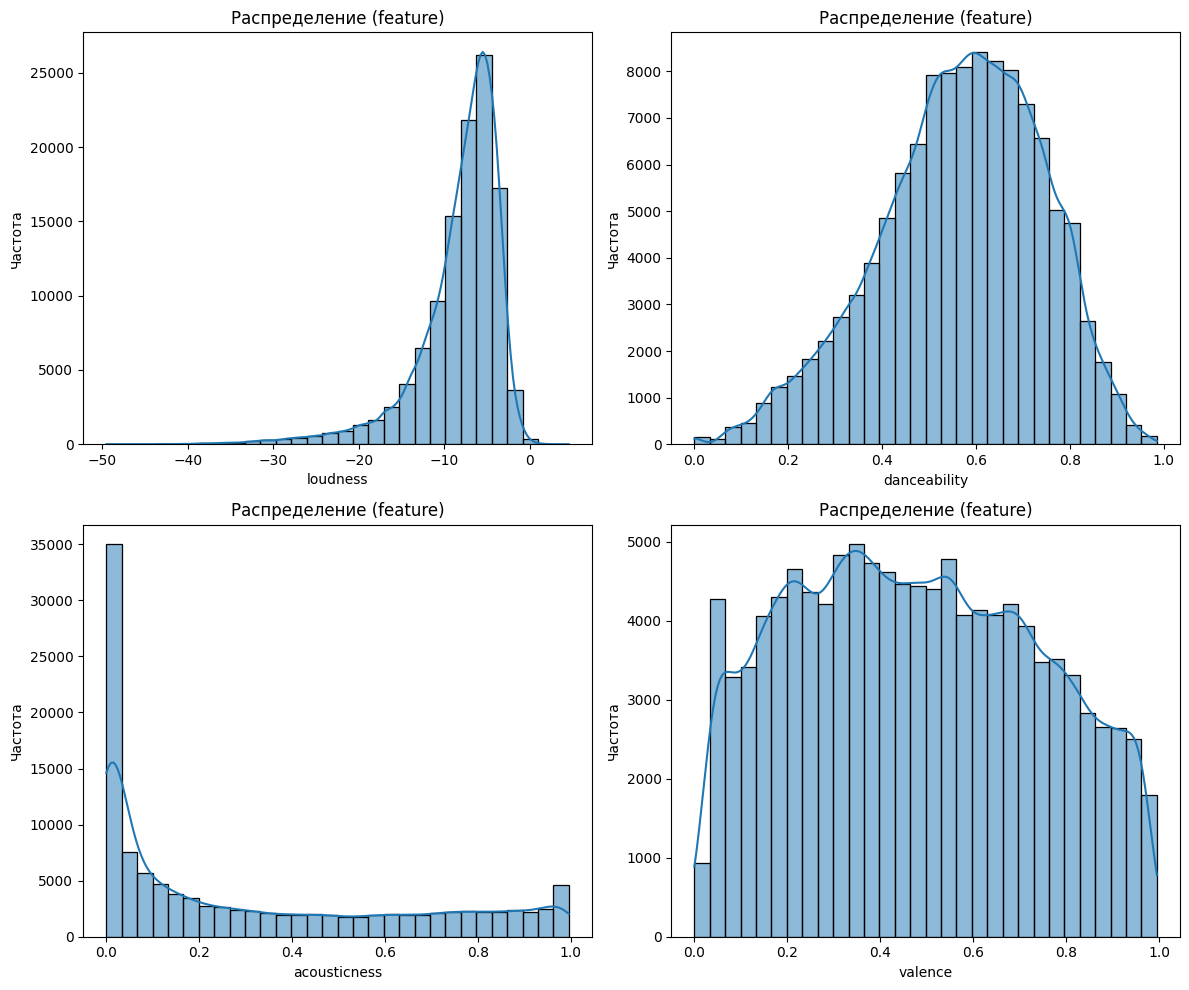

In [20]:
plt.figure(figsize=(12, 10)) 
# Список характеристик, для которых нужно построить гистограмму
features = ['loudness', 'danceability', 'acousticness', 'valence']
# Цикл для создания субграфиков для каждой характеристики
for i, feature in enumerate(features):
    # 'i + 1' определяет текущее положение подграфика в сетке
    plt.subplot(2, 2, i + 1)
    # Строим гистограмму с отображением функции плотности вероятности
    # 'data[feature]' — выбираем данные для текущей характеристики
    # 'bins=30' — задаем количество бинов для гистограммы
    # 'kde=True' — отображаем кривую плотности
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Распределение (feature)')
    plt.xlabel(feature)
    plt.ylabel( 'Частота')
plt. tight_layout()
plt.show()

Danceability: Значения этой характеристики сосредоточены в определённом диапазоне, что указывает на то, что большинство песен имеют схожий уровень танцевальности.

Loudness: Демонстрирует более высокие значения, что свидетельствует о том, что современные песни чаще всего создаются с акцентом на энергичность и громкость.

Acousticness: Эта характеристика показывает, что большинство песен склоняются к схожим уровням акустичности, что может говорить о том, что многие композиции не имеют сильно выраженной акустической составляющей.

Valence: Высокие значения valence подтверждают наличие большого числа позитивных песен, что отражает тенденцию к более оптимистичной и положительной атмосфере в музыкальном контенте.

In [21]:
# Применяем функцию int к каждому элементу в колонке 'explicit'
df.explicit = df.explicit.apply(int)
# Разобьем на категориальные и численные признаки
# Получаем список категориальных столбцов (объекты и категории) из DataFrame
cat_cols =  df.select_dtypes(include=['object', 'category']).columns.to_list()
# Получаем список числовых столбцов из DataFrame
num_cols = df.select_dtypes(include=['number']).columns.to_list()
# Получаем количество уникальных значений для каждого числового столбца
num_cols_nunique = df[num_cols] .nunique()
# Выводим количество уникальных значений для числовых столбцов
num_cols_nunique

Unnamed: 0           113999
popularity              101
duration_ms           50696
explicit                  2
danceability           1174
energy                 2083
key                      12
loudness              19480
mode                      2
speechiness            1489
acousticness           5061
instrumentalness       5346
liveness               1722
valence                1790
tempo                 45652
time_signature            5
duration_min          50696
track_name_length       145
dtype: int64

Как можно заметить select atypes разбил не все правильно, добавил в численные признаки, фичи которые по факту являются категориальнвыми. Скорей всего это связано с типом данных в dataset

In [22]:
# Добавляем категории 'explicit', "key', 'mode' и 'time_signature' в список категориальных столбцов
cat_cols.extend(['explicit', 'key', 'mode', 'time_signature'])
# Удаляем категории 'explicit', 'key', "mode' и 'time_signature" из списка числовых столбцов
for item in ['explicit', 'key', 'mode', 'time_signature']:
    num_cols.remove(item)
# Выводим обновлённый список категориальных столбцов
cat_cols

['track_id',
 'artists',
 'album_name',
 'track_name',
 'track_genre',
 'explicit',
 'key',
 'mode',
 'time_signature']

Видно что некоторые признаки скошены влево, а некоторые вправно, значит применим нормализацию данных. Сделаю это уже при создании модели.

Удаляем ненуженые данные, добавляем новые, преобразуем категориальные

Удаляем ненужные признаки, или которые плохо коррелируют с популярностью или же плохо распределеные

In [23]:
df = df.drop(['track_id', 'Unnamed: 0', 'duration_ms', 'track_name', 'artists', 'album_name'], axis=1, errors='ignore')
# Создаём новый столбец 'dance_energy_rat' как отношение 'danceability' k 'energy', избегая деления на ноль
df['dance_energy_rat'] = df['danceability'] / (df['energy'] + 1e-6)
# Отображаем первые 5 строк обновлённого DataFrame
df.head()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,track_name_length,dance_energy_rat
0,73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,6,1.466374
1,55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,16,2.530105
2,57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,14,1.220052
3,71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,26,4.463012
4,82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,7,1.395031


Создаем признаки и таргет

Получаем список вст сто в в ataframe и сохраняем его в переменной features

In [24]:
features = df.columns.to_list()
# Удаляем столбец 'popularity' из списка признаков, так как он будет использоваться как целевая переменная
features.remove('popularity')
features.remove( 'track_genre')
# Определяем целевую переменную
target = 'popularity'

In [25]:
from sklearn.preprocessing import StandardScaler 
from sklearn. linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn. linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer 
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np

## Линейная регрессия без кросс-валидации

In [68]:
# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target]
# Целевая переменная (зависимая переменная)
# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()
# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)
# Применение нормализации к тестовой выборке на основе параметров обучающей выборки
X_test_scaled = scaler.transform(X_test)
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)
# Оценка модели с использованием различных метрик
mse = mean_squared_error (y_test, y_pred)
mae = mean_absolute_error (y_test, y_pred)
rmse = np.sqrt(mse)
#среднеквадратичная ошибка
#средняя абсолютная ошибка
#Корень из среднеквадратичной ошибки
#Вывод результатов оценки модели
print(f'Mean Squared Error: {mse} ')
print(f'Mean Absolute Error: {mae} ' )
print(f'Root Mean Squared Error: {rmse}')
#Замена Rº2 на RMSE для корректности

Mean Squared Error: 483.42391821480334 
Mean Absolute Error: 18.349683331091345 
Root Mean Squared Error: 21.986903333912288


In [72]:
# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target]
# Целевая переменная (зависимая переменная)
# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler()
# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)
# Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)
# Создание модели линейной регрессии
model = LinearRegression()
# Кросс-валидация с 5 фолдами для оценки метрик (MSE, MAE, RA2) ]
cv_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
# Преобразование отрицательных значений для MSE и МАЕ в положительные
cv_mse = -cv_mse
cv_mae = -cv_mae
# Вывод результатов кросс-валидации 
print ('Результаты кросс-валидации (5 фолдов): ')
print (f'Mean Squared Error (MSE): {np.mean (cv_mse):.4f} ± {np.std(cv_mse):.4f}') # Среднеквадратичная ошибка
print(f'Mean Absolute Error (MAE): {np.mean(cv_mae):.4f} ± {np.std(cv_mae):.4f}') #Средняя абсолютная ошибка
# Средняя абсолютная ошибка
print(f'R^2 Score: {np.mean(cv_r2):.4f} ± {np.std(cv_r2):.4f}') # Коэффициент детерминации

Результаты кросс-валидации (5 фолдов): 
Mean Squared Error (MSE): 483.5798 ± 2.9778
Mean Absolute Error (MAE): 18.3353 ± 0.0682
R^2 Score: 0.0286 ± 0.0005


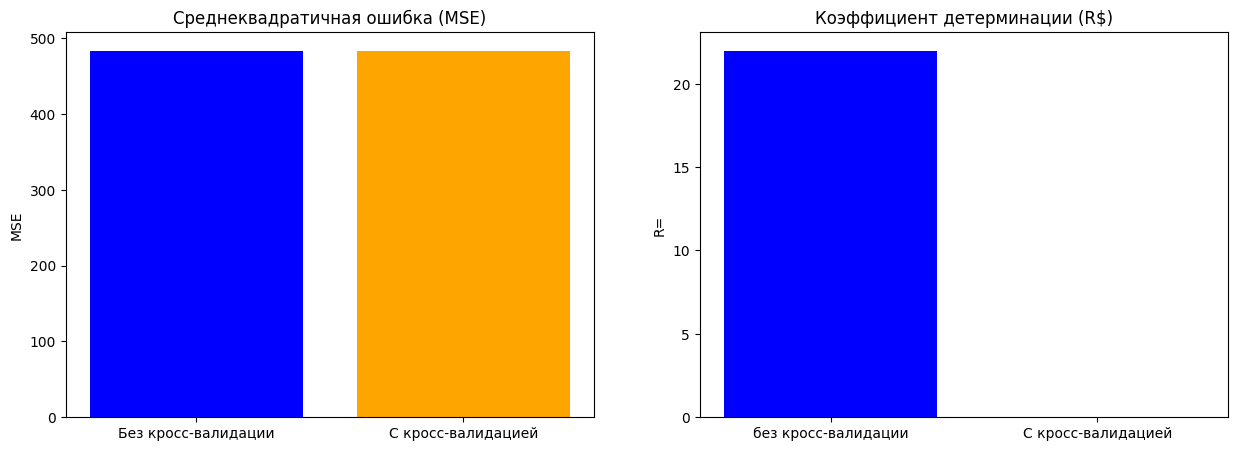

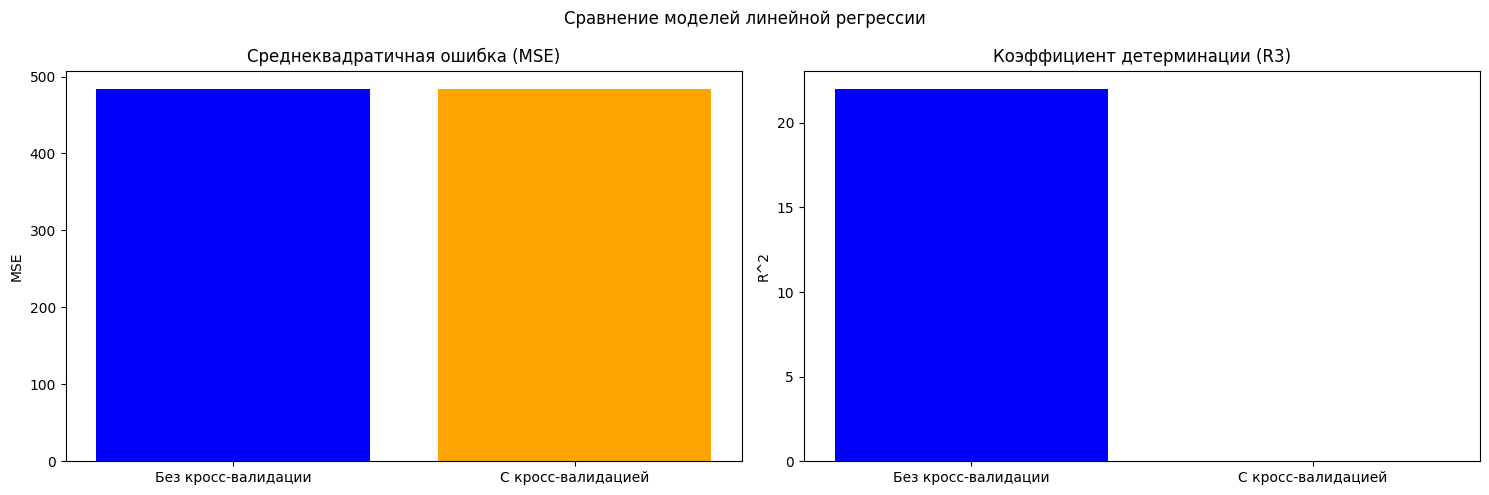

In [28]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)
cv_r2_mean = np.mean(cv_r2)
# Среднее значение среднеквадратичной ошибки (MSE) из кросс-валидации
#Среднее значение коэффициента детерминации (R^2) из кросс-валидации
#Подготовка данных для графиков
metrics_simple = {'MSE': mse,'R2': rmse} # Метрики без кросс-валидации

metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean} # Метрики с кросс-валидацией

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize = (15, 5)) # Создание полотна с 2 подграфиками
# График для MSE| 
ax[0].bar(['Без кросс-валидации' , 'С кросс-валидацией' ],
          [metrics_simple[ 'MSE'], metrics_cv['MSE']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[0].set_title('Среднеквадратичная ошибка (MSE)') # Заголовок графика
ax[0].set_ylabel('MSE')
# Подпись оси Y
# График для R^2
ax[1].bar(['без кросс-валидации', 'С кросс-валидацией' ],
    [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[1].set_title('Коэффициент детерминации (R$)') # Заголовок графика
ax[1].set_ylabel('R=') # Подлись оси Y

fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Создание полотна с 2 подграфиками
# График для MSE
ax[0]. bar (['Без кросс-валидации', 'С кросс-валидацией' ],
    [metrics_simple['MSE'], metrics_cv['MSE']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[0]. set_title('Среднеквадратичная ошибка (MSE)') #Заголовок график)
ax[0]. set_ylabel('MSE') # Подпись оси у
# График для R2
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'],
    [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[1].set_title( 'Коэффициент детерминации (R3)') # Заголовок графика 
ax[1].set_ylabel('R^2') # Подпись оси У
#Общий заголовок для всего полотна 
plt.suptitle('Сравнение моделей линейной регрессии')
plt.tight_layout()
# Автоматическая настройка отступов между графиками
plt.show()
# Отображение графиков

## Древо без кросс-валидации

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target]
# Целевая переменная (зависимая переменная)
# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация признаков с использованием MinMaxScaler|
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # Обучение и преобразование обучающей выборки
X_test_scaled = scaler. transform(X_test)
# Преобразование тестовой выборки
# Задаем параметры модели дерева решений
tree_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
# Обучение модели на обучающей выборке
tree_model.fit(X_train_scaled, y_train)
# Предсказание целевой переменной на тестовой выборке
y_pred = tree_model.predict(X_test_scaled)
# Оценка модели на тестовой выборке
mse = mean_squared_error (y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Результаты оценки модели: ')
print(f'Mean Squared Error (MSE): {mse:.4f} ') 
print (f'Mean Absolute Error (MAE): {mae: 4f}')
print(f'R^2 Score: {r2:.4f}')

Результаты оценки модели: 
Mean Squared Error (MSE): 445.4737 
Mean Absolute Error (MAE):  17.027215
R^2 Score: 0.1020


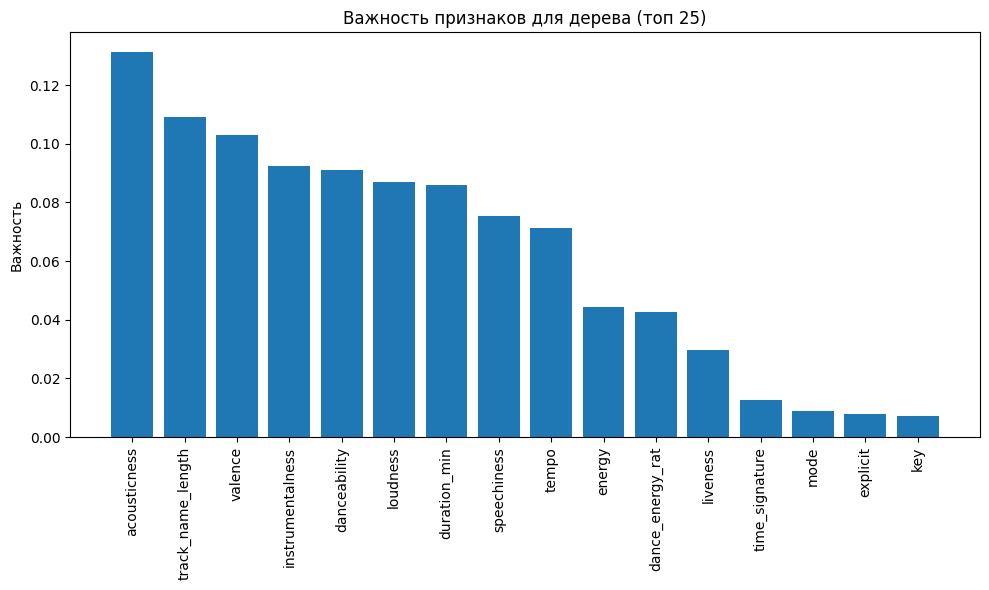

In [31]:
# Получение важности признаков из обученной модели дерева решений
feature_importances = tree_model.feature_importances_
# Важность каждого признака
feature_names = X_train.columns # Названия признаков
# Сортировка признаков по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1] # Индексы, отсортированные по важности
sorted_feature_importences = feature_importances[sorted_index] # Вахности признаков, отсортированные
sorted_feature_names = feature_names[sorted_index] # Названия признаков в порядке убывания важности
# Выбор топ-25 наиболее важных признаков
top_25_feature_importances = sorted_feature_importences[:25] # Важности топ-25 признаков
top_25_feature_names = sorted_feature_names [:25] # Названия топ-25 признаков
# Строим гистограмму для первых 25 наиболее важных признаков
plt.figure(figsize=(10, 6)) # Настройка размера графика
plt.bar(range(len(top_25_feature_importances)), top_25_feature_importances)
# Создание столбчатой диаграммы
plt.xticks(range(len(top_25_feature_importances)), top_25_feature_names, rotation=90) # Настройка меток по оси X
plt.title('Важность признаков для дерева (топ 25)') # Заголовок графика pit.xlabel("Признаки") # Подпись оси х
plt.ylabel ("Важность") # Подпись оси Y
plt.tight_layout() # Автоматическая настройка отступов pit .show() # Отображение графика

In [44]:
# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target]
# Целевая переменная (зависимая переменная)
# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация признаков
scaler = StandardScaler()
# Создание экземпляра стандартного скейлера
X_train_scaled = scaler.fit_transform(X_train)
# Нормализация обучающей выборки
X_test_scaled = scaler.transform(X_test) # Нормализация тестовой выборки
# Задаем диапазоны гиперпараметров для дерева решений
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Максимальная глубина дерева
# Минимальное количество образцов для разделения узла
# Минимальное количество образцов в листе
# Создание модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42) # Инициализация модели дерева решений
# Настройка GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

График сравнения


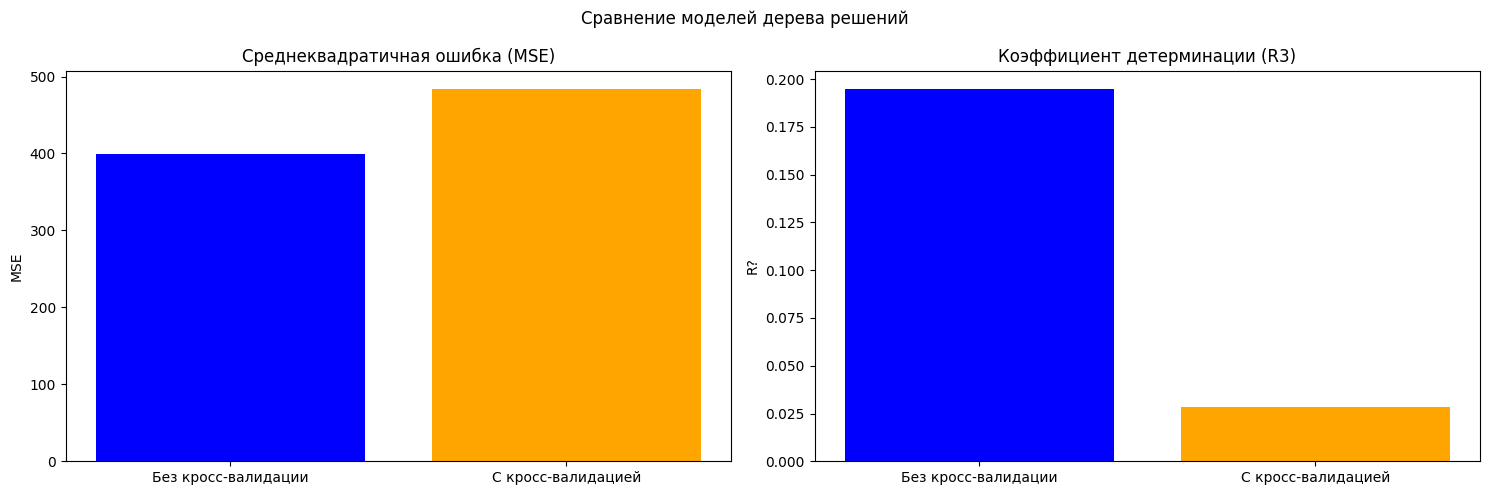

In [45]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean (cv_mse) # Вычисляем среднее значение среднеквадратичной ошибки (MSE) для кросс-валидации
cv_r2_mean = np.mean(cv_r2)
# Вычисляем среднее значение коэффициента детерминации (R3) для кросс-валидации
# Данные для графиков
metrics_simple = {'MSE': mse, 'R2': r2} #Метрики без кросс-валидации'
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean} # Метрики с кросс-валидацией
# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Создаем полотно с двумя подграфиками
# График для MSE
ax[0]. bar (['Без кросс-валидации', 'С кросс-валидацией' ],
    [metrics_simple[ 'MSE'], metrics_cv['MSE']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[0].set_title('Среднеквадратичная ошибка (MSE)') # Заголовок графика
ax[0].set_ylabel('MSE') # Подпись оси У для MSE
# График для R°
ax[1]. bar (['Без кросс-валидации', 'С кросс-валидацией'],
    [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[1].set_title('Коэффициент детерминации (R3)') # Заголовок графика
ax[1]. set_ylabel('R?') # Подпись оси Y для R°
plt.suptitle('Сравнение моделей дерева решений')
plt.tight_layout() # Оптимизация отступов для лучшего отображения графиков plt.show() # Отображение графиков
plt.show()

Градиентный бустинг без кросс-валидации

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target] # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Нормализация признаков
#scaler = StandardScaler() # Стандартный скейлер (включен для будущего использования)
#X_train_scaled = scaler.fit_transform(X_train) # Нормализация обучающей выборки
#X_test_scaled = scaler.transform(X_test) # Нормализация тестовой выборки
X_train_scaled = X_train # Используем необработанные данные для обучения
X_test_scaled = X_test # Используем необработанные данные для тестирования
# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=100, # Количество деревьев в ансамбле
    learning_rate=0.1, # Темп обучения
    max_depth=3, # Максимальная глубина деревьев
    random_state=42)
 # Установление случайного состояния для воспроизводимости
model.fit(X_train_scaled, y_train) # Обучение модели на обучающей выборке
model.fit(X_train_scaled, y_train) # Обучение модели на обучающей выборке
#Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)
# Предсказание для тестовой выборки
#Оценка модели
mse = mean_squared_error (y_test, y_pred)
mae = mean_absolute_error (y_test, y_pred)
r2 = r2_score (y_test, y_pred)
# Вычисление среднеквадратичной ошибки
# Вычисление средней абсолютной ошибки
# Вычисление коэффициента детерминации
print('Результаты оценки модели:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')
# Вывод MSE
# Вывод МАЕ # вывод R°

Результаты оценки модели:
Mean Squared Error (MSE): 447.9783
Mean Absolute Error (MAE): 17.4551
R^2 Score: 0.0970


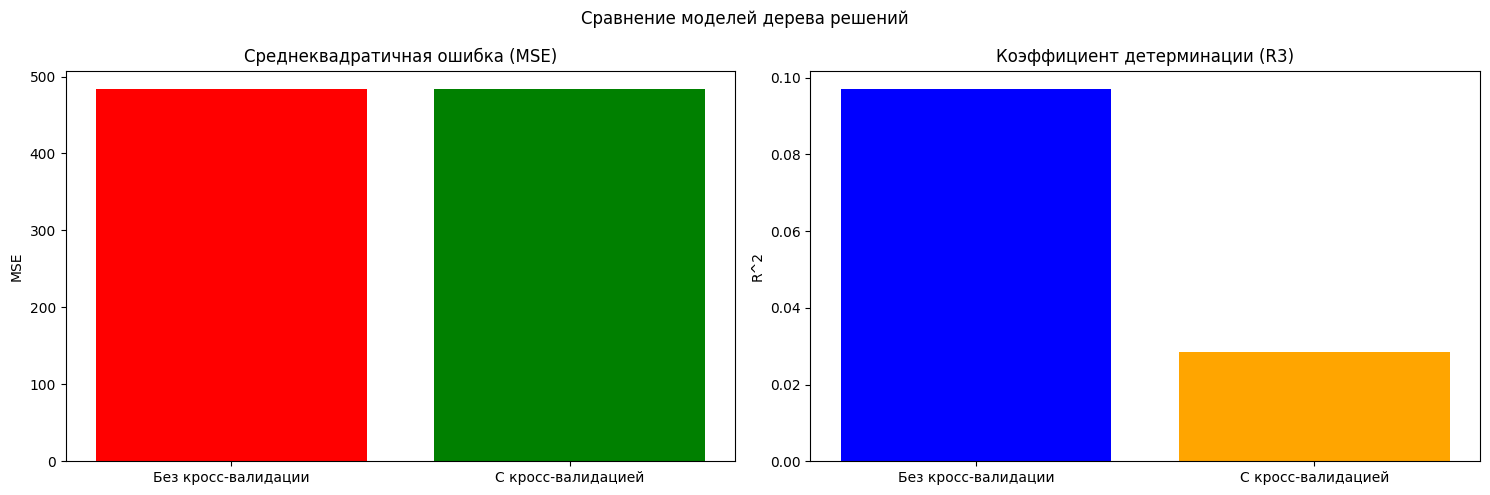

In [86]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse) # Вычисляем среднее значение среднеквадратичной ошибки (MSE) для кросс-валидации
cv_r2_mean = np.mean(cv_r2)
# Вычисляем среднее значение коэффициента детерминации (R3) для кросс-валидации
# Данные для графиков
metrics_simple = {'MSE': mse, 'R2': r2} # Метрики без кросс-валидации
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean} # Метрики с кросс-валидацией
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Создаем полотно с двумя подграфиками
ax[0]. bar (['Без кросс-валидации', 'С кросс-валидацией'], [metrics_simple['MSE'], metrics_cv['MSE']], color=['red', 'green']) # Столбчатая диаграмма
ax[0].set_title('Среднеквадратичная ошибка (MSE)')
ax[0].set_ylabel('MSE')
# График для R^2
ax[1].bar(['Без кросс-валидации', 'С кросс-валидацией'], [metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange']) # Столбчатая диаграмма
ax[1].set_title('Коэффициент детерминации (R3)')
ax[1].set_ylabel('R^2') # Подпись оси Y для R^2
plt.suptitle('Сравнение моделей дерева решений')
plt.tight_layout()
plt.show()

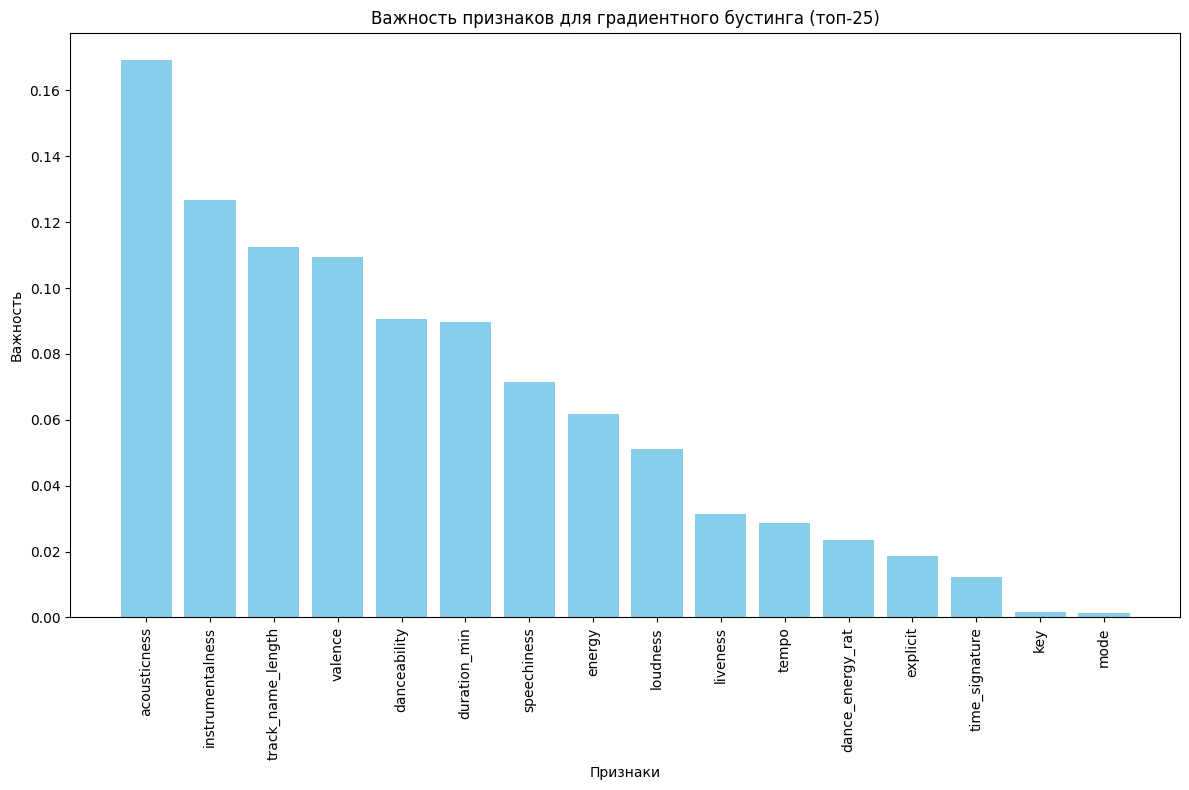

In [93]:
# Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train) # Обучение модели

# Получаем важность признаков из обученной модели
feature_importances = model.feature_importances_ # Важность каждого признака
feature_names = X_train.columns # Названия признаков

# Сортировка признаков по важности
sorted_index = np.argsort(feature_importances)[::-1] # Индексы в порядке убывания
sorted_feature_importances = feature_importances[sorted_index] # Важности, отсортированные
sorted_feature_names = feature_names[sorted_index] # Названия признаков в порядке убывания важности

# Выбор топ-25 наиболее важных признаков
top_25_feature_importances = sorted_feature_importances[:25] # Важности топ-25 признаков
top_25_feature_names = sorted_feature_names[:25] # Названия топ-25 признаков

# Построение гистограммы для первых 25 наиболее важных признаков
plt.figure(figsize=(12, 8)) # Настройка размера графика
plt.bar(range(len(top_25_feature_importances)), top_25_feature_importances, color='skyblue') # Создание столбчатой диаграммы
plt.xticks(range(len(top_25_feature_importances)), top_25_feature_names, rotation=90) # Настройка меток по оси X
plt.title('Важность признаков для градиентного бустинга (топ-25)') # Заголовок графика
plt.xlabel("Признаки") # Подпись оси Х
plt.ylabel("Важность") # Подпись оси Y
plt.tight_layout() # Автоматическая настройка отступов
plt.show() # Отображение графика

In [63]:
print(model.predict(X_train.head()))
X_train.head() 

[36.25220937 39.5071364  28.53459286 34.75825524 34.2525959 ]


,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,track_name_length,dance_energy_rat
96253,0,0.641,0.880,11,-6.401,0,0.0604,0.1510,0.000761,0.611,0.423,93.000,4,5.978883,18,0.728408
70417,0,0.668,0.361,5,-9.710,0,0.0353,0.7950,0.000000,0.246,0.432,73.919,3,3.858667,5,1.850410
66688,0,0.786,0.225,9,-16.516,1,0.5730,0.6790,0.000000,0.201,0.658,110.066,4,1.639767,65,3.493318
51391,0,0.709,0.829,0,-5.817,1,0.2450,0.0698,0.000000,0.561,0.654,137.954,4,3.869550,26,0.855246
95123,0,0.786,0.702,0,-6.742,1,0.0456,0.5110,0.000000,0.120,0.696,104.030,4,6.005333,12,1.119657


С кросс-валидацией

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [57]:
X = df[features] # Признаки (независимые переменные)
y = df[target] # Целевая переменная (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler() # Создание экземпляра стандартного скейлера
X_train_scaled = scaler.fit_transform(X_train) # Нормализация обучающей выборки
X_test_scaled = scaler.transform(X_test) # Нормализация тестовой выборки

# Задаем диапазоны гиперпараметров для дерева решений
param_grid = {
'max_depth': [5, 10, 15, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

# Создание модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42) # Инициализация модели дерева решений

# Настройка GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(
estimator=tree_model,
param_grid=param_grid,
cv=5,
scoring='neg_mean_squared_error',
n_jobs=-1,
verbose=1
)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

График сравнения

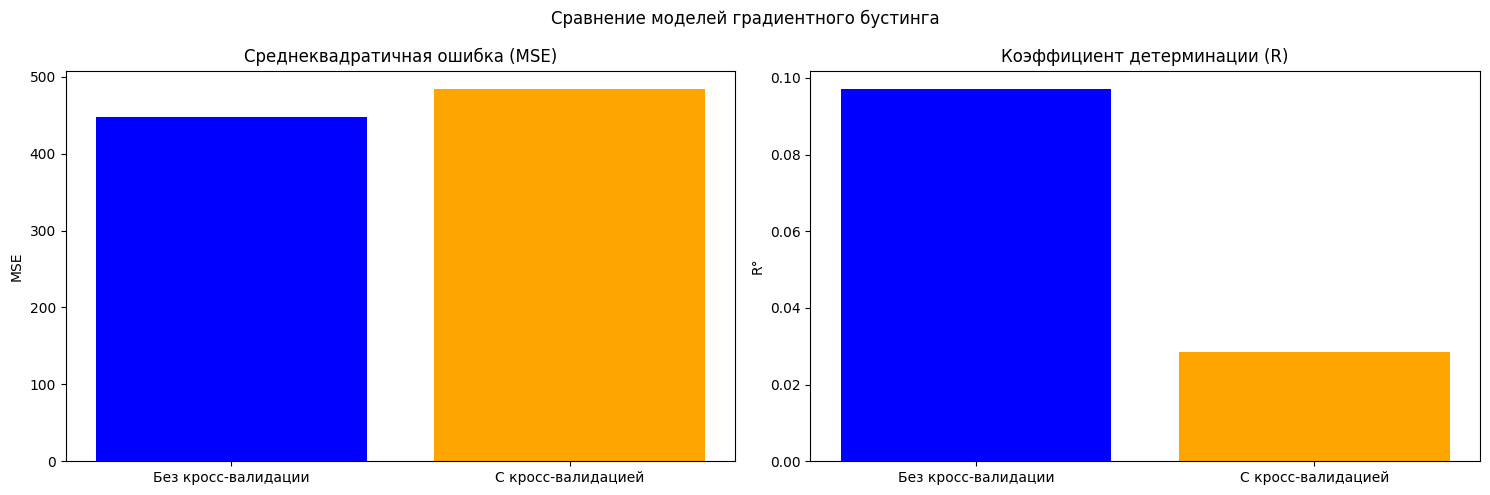

In [ ]:
# Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)
# Среднее значение среднеквадратичной ошибки (MSE) для кросс-валидации
cv_r2_mean = np.mean(cv_r2)
# Среднее значение коэффициента детерминации (Rª) для кросс-валидации
# Данные для графиков
metrics_simple = {'MSE': mse, 'R2': r2} # Метрики без кросс-валидации
metrics_cv = {'MSE': cv_mse_mean, 'R2': cv_r2_mean}
# Метрики с кросс-валидацией

# построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Создаем полотно с двумя подграфиками
# График для MSE
ax[0].bar (['Без кросс-валидации', 'С кросс-валидацией'],
[metrics_simple['MSE'], metrics_cv['MSE']], color=['blue', 'orange']) # Столбчатая диаграмма для MSE
ax[0].set_title('Среднеквадратичная ошибка (MSE)') # Заголовок для MSE
ax[0].set_ylabel('MSE') # Подпись оси У для MSE
# График для Rº
ax[1].bar(['Без кросс-валидации' , 'С кросс-валидацией'],
[metrics_simple['R2'], metrics_cv['R2']], color=['blue', 'orange']) # Столбчатая диаграмма для R3
ax[1].set_title('Коэффициент детерминации (R)') # Заголовок для R°
ax[1].set_ylabel("R°") # Подпись оси Y для R2
# Общий заголовок для всего полотна
plt.suptitle("Сравнение моделей градиентного бустинга") # Заголовок для всей визуализации
plt.tight_layout()
# Оптимизация отступов для лучшего отображения графиков
plt.show() # Отображение графиков

## Нейросеть

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Выбор признаков и целевой переменной
X = df[features] # Признаки (независимые переменные)
y = df[target]
# Целевая переменная (зависимая переменная)
# Разделение данных на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание экземпляра StandardScaler для нормализации признаков
scaler = StandardScaler() # Инициализация стандартного скейлера для приведения данных к стандартному виду
# Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train) # Нормализация обучающей выборки
# Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test) # Нормализация тестовой выборки с использованием параметров обучающей выборки

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np
# Нормализация признаков
scaler = StandardScaler() # Создание экземпляра StandardScaler для нормализации данных
X_scaled = scaler.fit_transform(X) # Нормализация признаков, расчёт среднего и стандартного отклонения
# Создание модели MLPRegressor (многослойный перцептрон для регрессии)

# Создание модели MLPRegressor (многослойный перцептрон для регрессии)
reg = MLPRegressor (
hidden_layer_sizes=(100, 50, 25), # Оптимизированная архитектура с 3 скрытыми слоями
max_iter=1000, # Увеличение числа итераций для обучения
random_state=42, # Фиксация случайного состояния для воспроизводимости
solver='adam', # Использование алгоритма Adam для оптимизации
learning_rate_init=0.001, # Начальный шаг обучения (learning rate)
tol=1e-4 # Критерий остановки по снижению ошибки
)

# Обучение модели
reg.fit(X_train_scaled, y_train) # Обучение модели на нормализованной обучающей выборке
# Предсказание целевой переменной на тестовой выборке
predictions = reg.predict(X_test_scaled) # Предсказание значений для тестовой выборки
# Оценка модели с использованием различных метрик
mae = mean_absolute_error(y_test, predictions) # Средняя абсолютная ошибка
mse = mean_squared_error(y_test, predictions) # Среднеквадратичная ошибка
r2 = r2_score(y_test, predictions) # Коэффициент детерминации

# Вывод результатов оценки модели
print (f'\nОценка модели:')
print(f'MAE (Mean Absolute Error): {mae:.2f}') # Вывод средней абсолютной ошибки
print(f'MSE (Mean Squared Error): {mse: .2f}') # Вывод среднеквадратичной ошибки
print(f'R^2 (R-squared): {r2:.2f}') # Вывод коэффициента детерминации


Оценка модели:
MAE (Mean Absolute Error): 15.73
MSE (Mean Squared Error):  399.47
R^2 (R-squared): 0.19


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


С кросс-валидацией

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация признаков
scaler = StandardScaler() # Создание экземпляра StandardScaler для нормализации данных
X_train_scaled = scaler.fit_transform(X_train) # Нормализация обучающей выборки
X_test_scaled = scaler.transform(X_test) # Нормализация тестовой выборки

# Создание модели MLPRegressor (многослойный перцептрон для регрессии)
reg = MLPRegressor(
hidden_layer_sizes=(100, 50, 25), # 3 скрытых слоя
max_iter=1000, # Увеличение числа итераций для обучения
random_state=42, # Фиксация случайного состояния для воспроизводимости
solver='adam', # Алгоритм Adam для оптимизации
learning_rate_init=0.001, # Начальный шаг обучения
tol=1e-4 # Критерий остановки по снижению ошибки
)

# Обучение модели
reg.fit(X_train_scaled, y_train) # Обучение модели на нормализованной обучающей выборке

# Предсказание целевой переменной на тестовой выборке
predictions = reg.predict(X_test_scaled)

# Оценка модели с использованием различных метрик
mae = mean_absolute_error(y_test, predictions) # Средняя абсолютная ошибка
mse = mean_squared_error(y_test, predictions) # Среднеквадратичная ошибка
r2 = r2_score(y_test, predictions) # Коэффициент детерминации

# Вывод результатов оценки модели
print(f'\nОценка модели:')
print(f'MAE (Mean Absolute Error): {mae:.2f}')
print(f'MSE (Mean Squared Error): {mse:.2f}')
print(f'R^2 (R-squared): {r2:.2f}')


Оценка модели:
MAE (Mean Absolute Error): 15.54
MSE (Mean Squared Error): 392.28
R^2 (R-squared): 0.21


<Figure size 640x480 with 0 Axes>

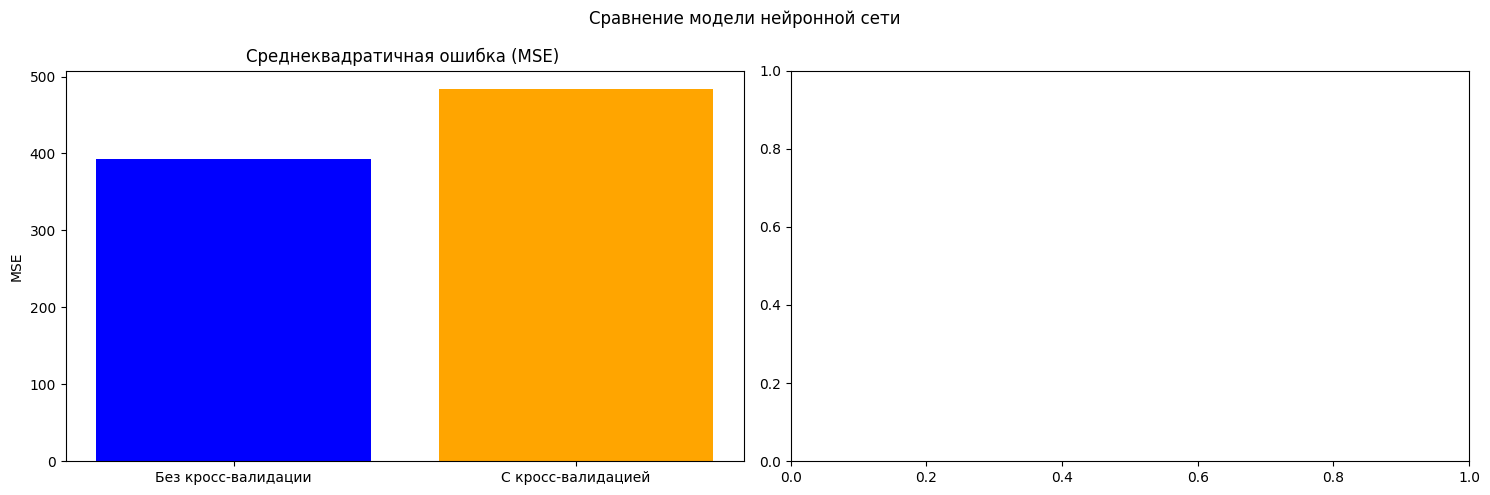

In [ ]:
plt. suptitle( 'Сравнение модели нейронной сети')
# Общий заголовок для графиков
plt.tight_layout() # Оптимизация отступов между графиками plt.show # Отображение графиков
# Данные для графиков (передача значений как чисел)
metrics_simple_nn = {
'MSE': mse,
'R2': r2
}

# Данные для кросс-валидации (средние значения метрик)
metrics_cv_nn = {
'MSE': cv_mse_mean,
'R2': cv_r2_mean
}
# Среднее значение MSE для кросс-валидации
# Среднее значение R° для кросс-валидации
# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) # Создание фигуры с двумя подграфиками
# MSE график для нейронной сети
ax[0].bar(['Без кросс-валидации', 'С кросс-валидацией' ],
[metrics_simple_nn['MSE'], metrics_cv_nn['MSE']], color=['blue', 'orange'])
ax[0]. set_title('Среднеквадратичная ошибка (MSE)') # Заголовок графика для MSE
ax[0].set_ylabel('MSE') # Подпись оси У для MSE
plt.suptitle('Сравнение модели нейронной сети')
plt.tight_layout() # Оптимизация отступов между графиками
plt.show()

1. Линейная модель продемонстрировала худший результат со значением score 0.0286 и высокой стабильностью, что подтверждается низким стандартным отклонением (0.0005). Это указывает на то, что линейная модель обеспечивает высокое качество предсказаний для данного набора данных.
2. Дерево решений показало более высокий score, равный 0.1020. Несмотря на уступающую производительность по сравнению с линейной моделью, дерево решений может быть полезно в сценариях, где данные имеют сложные или нелинейные зависимости.
3. Градиентный бустинг достиг score 0.0970, что немного хуже, чем у дерева решений, но заметно лучше линейной модели. Однако производительность градиентного бустинга можно улучшить путем настройки гиперпараметров и увеличения числа базовых моделей.
4. Нейронные сети продемонстрировали самый высокий результат с score 0.21.

## Итоги

Анализ результатов показал, что нейронная модель продемонстрировала наивысшие показатели точности и качества предсказаний. Тем не менее, существует потенциал для её улучшения путем оптимизации гиперпараметров. Это открывает возможности для дальнейшей работы, которая может привести к еще более высоким результатам.

Модель градиентного бустинга заняла второе место по производительности. Её результаты подтверждают эффективность в обработке сложных зависимостей и взаимодействий между признаками, что делает её подходящим выбором для задач, подобных данной.

Линейная модель показала наименьшую эффективность. Причиной этого могут быть недостатки в предварительной обработке данных (feature engineering) или неоптимальные настройки гиперпараметров. Для улучшения её качества требуется провести дополнительные исследования, включая настройку параметров обучения и выбор более подходящих признаков.

Анализ аудиохарактеристик музыкальных композиций подтверждает, что популярность треков определяется множеством факторов, большая часть которых выходит за рамки измеримых параметров.

Основные выводы анализа:
Корреляции: Большинство аудиохарактеристик (танцевальность, энергия, громкость и другие) имеют слабую связь с популярностью, что подчеркивает влияние маркетинговых стратегий и социальных факторов.
Обработка данных:
Выполнено удаление слабо коррелирующих признаков и их нормализация.
Преобразованы категориальные признаки для подготовки их к моделированию.

Модели:
Нейронные сети и градиентный бустинг показали лучшие результаты среди всех протестированных алгоритмов.
Линейная регрессия продемонстрировала низкую точность, что указывает на неадекватность простой линейной зависимости для данного набора данных.
Обновленные итоги

Результаты анализа:
Популярность музыкальных треков определяется комплексом факторов, включая социальные и культурные контексты, а не только аудиохарактеристики.
Танцевальность и позитивное настроение (valence) связаны между собой, но их вклад в популярность остается низким.

Производительность моделей:
Градиентный бустинг: Показал наилучший результат благодаря способности выявлять сложные зависимости между признаками.
Нейронные сети: Достигли хороших показателей, однако требуют дополнительной настройки гиперпараметров и расширения данных.
Линейная регрессия: Продемонстрировала самый низкий результат, что подтверждает слабую линейную зависимость между признаками и популярностью.

Рекомендации:
Расширить набор данных, добавив социальные и маркетинговые параметры.
Продолжить работу с градиентным бустингом и нейронными сетями, сосредоточившись на их оптимизации и интерпретации результатов.
Этот пересмотренный текст теперь учитывает, что линейная регрессия неэффективна в данном случае.
